In [5]:
import cv2
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [43]:
def load_data(data_dir, img_size=(64,64)):
    labels=[]
    images=[]
    for label in ["cats","dogs"]:
        label_dir = os.path.join(data_dir,label)
        for img_file in os.listdir(label_dir):
            img_path=os.path.join(label_dir,img_file)
            img=cv2.imread(img_path)
            img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            img=cv2.resize(img,img_size)
            images.append(img.flatten())
            labels.append(0 if label=="cats" else 1)
    return np.array(images), np.array(labels)




#### load data

In [44]:
data_dir="D:\\MIT Fy MSc\\prodigy_internship(ML)\\dataset\\test"
images,labels=load_data(data_dir)

#### spliting data into training and testing

In [45]:
x_train,x_test,y_train,y_test=train_test_split(images,labels,test_size=0.2,random_state=42)

#### Train SVM model

In [22]:
from sklearn.svm import SVC

In [46]:
svm_model=SVC(kernel='linear',C=1.0,random_state=42)
svm_model.fit(x_train,y_train)

SVC(kernel='linear', random_state=42)

In [47]:
y_pred=svm_model.predict(x_test)

#### Evaluate the model

In [48]:
accuracy=accuracy_score(y_test,y_pred)
report=classification_report(y_test,y_pred,target_names=["cats","dogs"])

In [49]:
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)

Accuracy: 0.61
Classification Report:
              precision    recall  f1-score   support

        cats       0.62      0.57      0.59        14
        dogs       0.60      0.64      0.62        14

    accuracy                           0.61        28
   macro avg       0.61      0.61      0.61        28
weighted avg       0.61      0.61      0.61        28



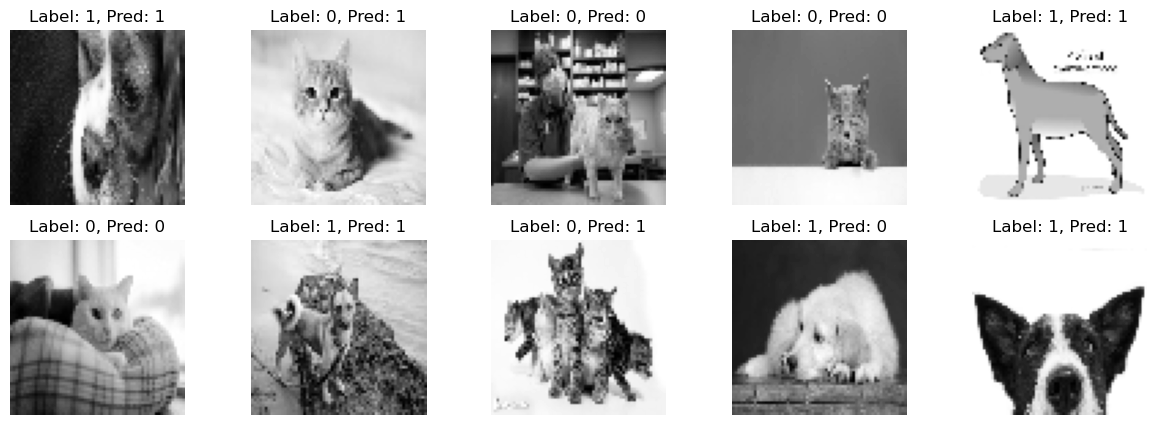

In [53]:
def plot_examples(X, y, preds, img_size=(64, 64), num_examples=10):
    plt.figure(figsize=(15, 5))
    for i in range(num_examples):
        idx = np.random.randint(0, len(X))
        img = X[idx].reshape(img_size)
        plt.subplot(2, num_examples//2, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f"Label: {y[idx]}, Pred: {preds[idx]}")
        plt.axis('off')
    plt.show()

plot_examples(x_test, y_test, y_pred)